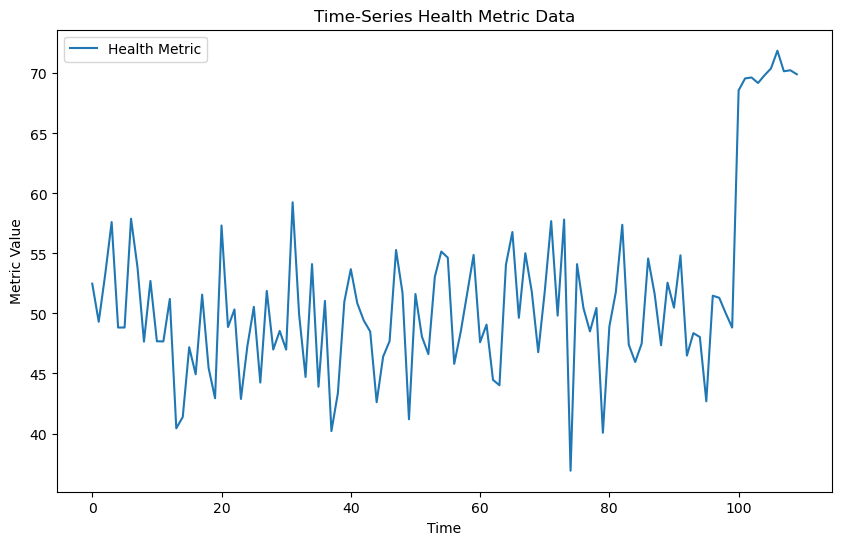

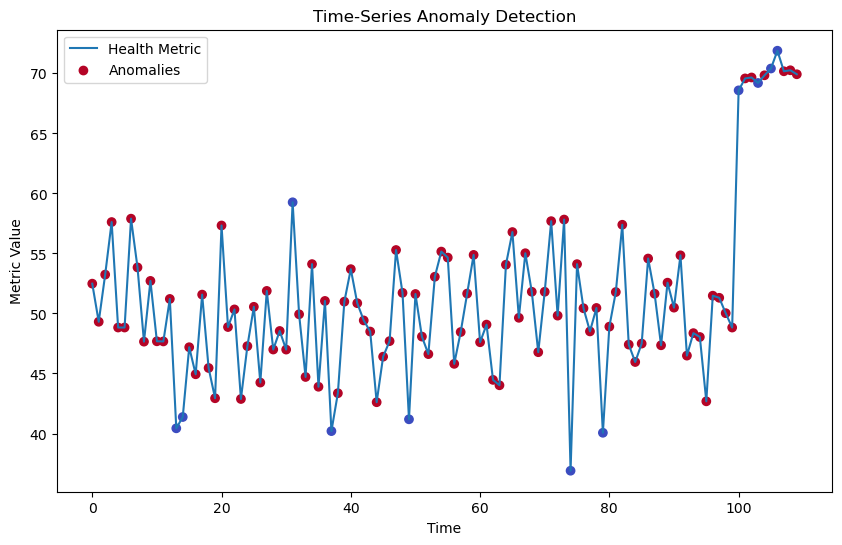

Detected Anomalies:
      Health Metric  Anomaly
13       40.433599       -1
14       41.375411       -1
31       59.261391       -1
37       40.201649       -1
49       41.184799       -1
74       36.901274       -1
79       40.062155       -1
100      68.584629       -1
103      69.197723       -1
105      70.404051       -1
106      71.886186       -1


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate synthetic time-series data (e.g., patient health metrics)
np.random.seed(42)
data_normal = np.random.normal(loc=50, scale=5, size=(100, 1))  # Normal data
data_anomalies = np.random.normal(loc=70, scale=1, size=(10, 1))  # Anomalous data

# Combine normal and anomalous data
data = np.vstack([data_normal, data_anomalies])
time_series_data = pd.DataFrame(data, columns=['Health Metric'])

# Plot the time-series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Health Metric')
plt.title('Time-Series Health Metric Data')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
model.fit(time_series_data)

# Predict anomalies (-1 for anomalies, 1 for normal data)
time_series_data['Anomaly'] = model.predict(time_series_data)

# Plot anomalies on the time-series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Health Metric'], label='Health Metric')
plt.scatter(time_series_data.index, 
            time_series_data['Health Metric'], 
            c=time_series_data['Anomaly'], 
            cmap='coolwarm', label='Anomalies')
plt.title('Time-Series Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Show the detected anomalies
anomalies = time_series_data[time_series_data['Anomaly'] == -1]
print("Detected Anomalies:\n", anomalies)